In [280]:
%run src/ZooAnimals.ipynb

In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [282]:
file_path = r"C:\Users\Akash Mittal\Documents\Zoo_Lab\zoo.xlsx" #File Path of the Input File with Features of Animals

In [283]:
animal_data = DataProcessor(file_path)

In [284]:
animal_data.import_data() # Imporitng Data

File Read OK.


In [285]:
print(animal_data.data) #Snapshot of Input Data

    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1 

In [286]:
X = animal_data.data.drop(['class_type'], axis=1) # Dropping the Class_type column

In [287]:
Y = animal_data.data['class_type'] # Target Column for Animal Class 

In [288]:
# animal_data.create_pair_plot() # Creating a PairWise ScatterPlot for the Different Animal Features {Commented Out as it Takes more time to Plot that much graphs}

In [289]:
# Using AffinityPropagation to Cluster the Data Points

In [290]:
X_numeric = X.drop(['animal_name'], axis=1)

In [291]:
af = AffinityPropagation(damping = 0.7, preference = None)

In [292]:
af.fit(X_numeric)

AffinityPropagation(damping=0.7)

In [293]:
cluster_centers = af.cluster_centers_ #Get the Cluster Centers

In [294]:
labels = af.labels_ #Get labels for each data point

In [295]:
n_clusters = len(cluster_centers) # Number of Clusters

In [297]:
print(n_clusters)

8


In [298]:
# plotting the clusters

In [299]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

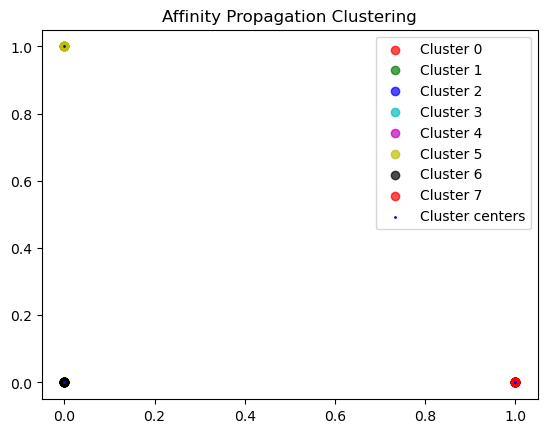

In [315]:
for i in range(n_clusters):
    plt.scatter(X_numeric.values[labels == i, 0], X_numeric.values[labels == i, 1], c=colors[i % len(colors)], alpha=0.70, label='Cluster {}'.format(i))

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=1, color='blue', label='Cluster centers')
plt.title('Affinity Propagation Clustering')
plt.legend()
plt.show()

In [302]:
unique_labels = np.unique(labels)
for label in unique_labels:
    cluster_size = np.sum(labels == label)
    print(f"Cluster {label}: {cluster_size} data points")

Cluster 0: 17 data points
Cluster 1: 15 data points
Cluster 2: 4 data points
Cluster 3: 6 data points
Cluster 4: 19 data points
Cluster 5: 20 data points
Cluster 6: 13 data points
Cluster 7: 7 data points
